<a href="https://colab.research.google.com/github/Praveen-ctrl-tech/Hybrid-Stock-Price-Prediction-using-LSTM-and-XGBoost/blob/main/Hybrid_Stock_Prediction_(LSTM_%2B_XGBoost)_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#  1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from xgboost import XGBClassifier

In [2]:
# ---------------------------------------------------------------
# 2️  Load the Dataset
# ---------------------------------------------------------------
# Replace with your dataset file name
data = pd.read_csv("/content/archive(4).zip")

print("✅ Dataset Loaded Successfully!")
print(data.head())

✅ Dataset Loaded Successfully!
       Open     Close      High       Low    Volume       RSI      MACD  \
0  0.374639  0.374780  0.373510  0.378390  0.298909  0.847286  0.741715   
1  0.950982  0.937746  0.938422  0.946158  0.094805  0.494543  0.881343   
2  0.732198  0.719825  0.723644  0.723158  0.126348  0.195471  0.463179   
3  0.598823  0.599865  0.596973  0.605322  0.180662  0.736684  0.289076   
4  0.156053  0.163410  0.155891  0.166084  0.203646  0.418698  0.318761   

   Bollinger_Upper  Bollinger_Lower  Sentiment_Score  GDP_Growth  \
0         0.367146         0.366420         0.877177    0.580868   
1         0.938396         0.935640         0.907192    0.527044   
2         0.710666         0.702300         0.378363    0.351052   
3         0.593793         0.586936         0.231614    0.493274   
4         0.164158         0.156355         0.191642    0.365116   

   Inflation_Rate  Target  
0        0.038604       0  
1        0.108908       0  
2        0.432540       0

In [7]:
# 3️  Feature Selection
# ---------------------------------------------------------------
features = [
    "Open", "High", "Low", "Close", "Volume",
    "RSI", "MACD", "Bollinger_Upper", "Bollinger_Lower",
    "Sentiment_Score", "GDP_Growth", "Inflation_Rate"
]
target = "Target"

# Check if all features exist
for f in features + [target]:
    if f not in data.columns:
        raise ValueError(f"Missing column in dataset: {f}")

In [8]:
# 4️ Data Preprocessing
# ---------------------------------------------------------------
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])
X = np.array(scaled_data)
y = np.array(data[target])

In [9]:
# 5️ Create LSTM Input (Sequential Time Steps)
# ---------------------------------------------------------------
time_steps = 10
X_lstm, y_lstm = [], []
for i in range(time_steps, len(X)):
    X_lstm.append(X[i - time_steps:i])
    y_lstm.append(y[i])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

print("LSTM Input Shape:", X_lstm.shape)

LSTM Input Shape: (9990, 10, 12)


In [10]:
# 6️ Train/Test Split
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_lstm, y_lstm, test_size=0.2, random_state=42
)

In [11]:
# 7️ Build LSTM Model
# ---------------------------------------------------------------
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dense(1, activation="sigmoid")
])
lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("\n🔹 Training LSTM Model...")
history = lstm_model.fit(
    X_train, y_train, epochs=10, batch_size=16,
    validation_split=0.1, verbose=1
)



🔹 Training LSTM Model...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9373 - loss: 0.2646 - val_accuracy: 0.9350 - val_loss: 0.2430
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9366 - loss: 0.2371 - val_accuracy: 0.9350 - val_loss: 0.2411
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9377 - loss: 0.2340 - val_accuracy: 0.9350 - val_loss: 0.2427
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9380 - loss: 0.2331 - val_accuracy: 0.9350 - val_loss: 0.2407
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9354 - loss: 0.2401 - val_accuracy: 0.9350 - val_loss: 0.2405
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9371 - loss: 0.2358 - val_accuracy: 0.9350 - val_loss: 0.2404
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9345 - loss: 0.2418 - val_accuracy: 0.9350 - val_loss: 0.2404
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9393 - loss: 0.2291 - val_accuracy: 0.

In [13]:
# 8️ Generate LSTM Output (Feature for XGBoost)
# ---------------------------------------------------------------

# ✅ Use X_lstm instead of X — correct 3D input
lstm_features = lstm_model.predict(X_lstm).reshape(-1, 1)

# Align the rest of the data accordingly
# scaled_data[time_steps:] and y[time_steps:] match X_lstm length
X_combined = np.hstack((scaled_data[time_steps:], lstm_features))
y_combined = y[time_steps:]

# Split data for XGBoost training
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [14]:
# 9️ Train XGBoost Model
# ---------------------------------------------------------------
print("\n🔹 Training XGBoost Classifier...")
xgb = XGBClassifier(
    n_estimators=200, learning_rate=0.05, max_depth=5,
    subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss'
)
xgb.fit(X_train2, y_train2)



🔹 Training XGBoost Classifier...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:35:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [15]:
# 10 Evaluation Metrics
# ---------------------------------------------------------------
y_pred = xgb.predict(X_test2)
y_prob = xgb.predict_proba(X_test2)[:, 1]

acc = accuracy_score(y_test2, y_pred)
prec = precision_score(y_test2, y_pred)
rec = recall_score(y_test2, y_pred)
f1 = f1_score(y_test2, y_pred)
roc = roc_auc_score(y_test2, y_prob)

print("\n✅ MODEL EVALUATION RESULTS:")
print(f"Accuracy      : {acc:.3f}")
print(f"Precision     : {prec:.3f}")
print(f"Recall        : {rec:.3f}")
print(f"F1 Score      : {f1:.3f}")
print(f"ROC-AUC Score : {roc:.3f}")

print("\n📊 Classification Report:\n")
print(classification_report(y_test2, y_pred, target_names=["Sell (0)", "Buy (1)"]))



✅ MODEL EVALUATION RESULTS:
Accuracy      : 0.960
Precision     : 0.821
Recall        : 0.237
F1 Score      : 0.368
ROC-AUC Score : 0.964

📊 Classification Report:

              precision    recall  f1-score   support

    Sell (0)       0.96      1.00      0.98      1901
     Buy (1)       0.82      0.24      0.37        97

    accuracy                           0.96      1998
   macro avg       0.89      0.62      0.67      1998
weighted avg       0.96      0.96      0.95      1998



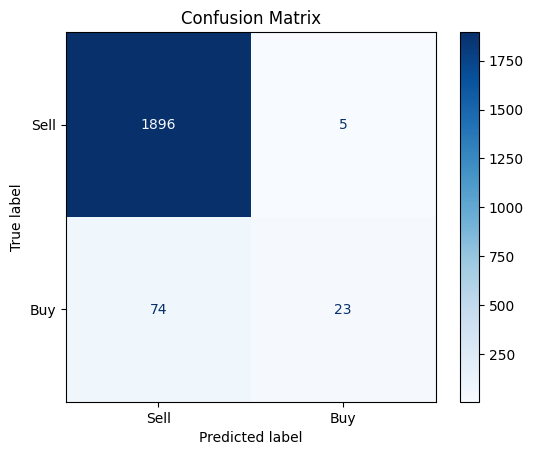

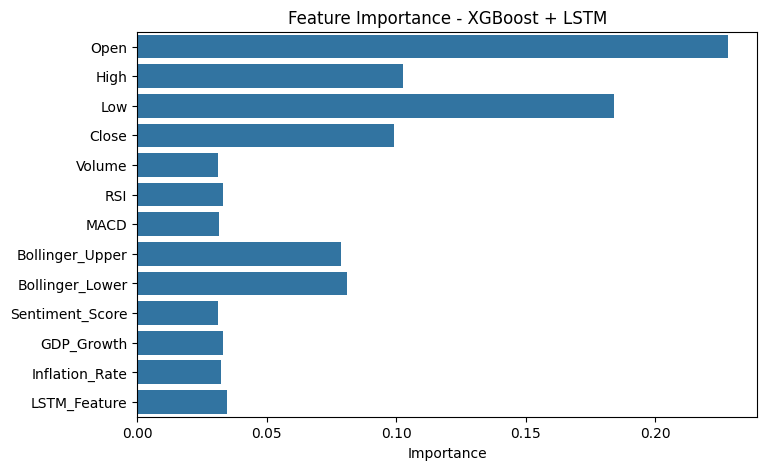

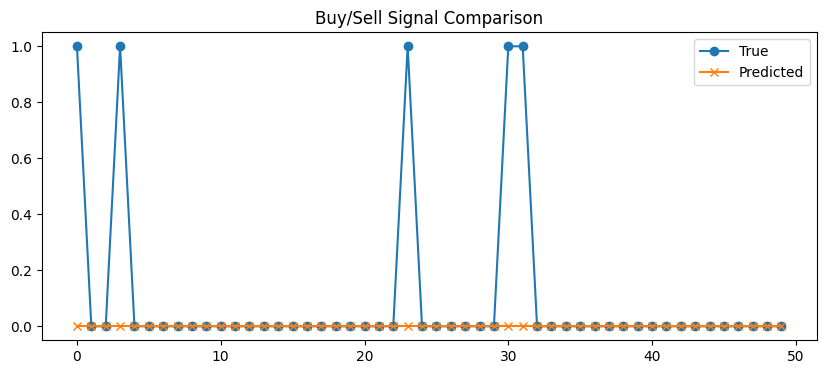

In [17]:
# 11  Visualization
# ---------------------------------------------------------------
# Confusion Matrix
cm = confusion_matrix(y_test2, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sell", "Buy"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(
    x=xgb.feature_importances_,
    y=features + ["LSTM_Feature"],
    orient="h"
)
plt.title("Feature Importance - XGBoost + LSTM")
plt.xlabel("Importance")
plt.show()

# Prediction Comparison
plt.figure(figsize=(10,4))
plt.plot(y_test2[:50], label="True", marker="o")
plt.plot(y_pred[:50], label="Predicted", marker="x")
plt.title("Buy/Sell Signal Comparison")
plt.legend()
plt.show()


In [16]:
# 12  Real-Time Prediction
# ---------------------------------------------------------------
latest_data = X_combined[-1].reshape(1, -1)
pred = xgb.predict(latest_data)[0]

print("\n💡 Real-Time Prediction:")
if pred == 1:
    print("💹 Model Suggests: BUY Tomorrow")
else:
    print("📉 Model Suggests: SELL Tomorrow")


💡 Real-Time Prediction:
📉 Model Suggests: SELL Tomorrow


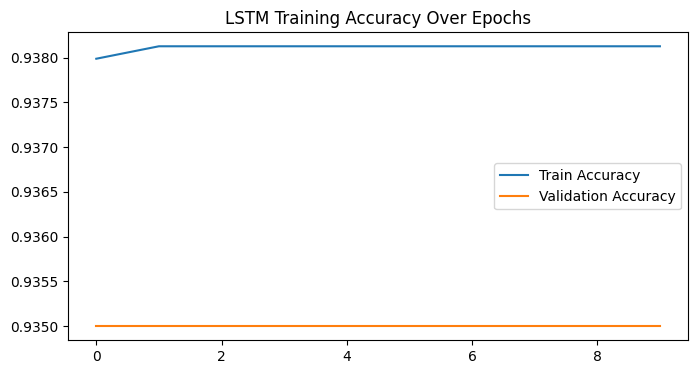

In [18]:
# 13  Show LSTM Training Performance
# ---------------------------------------------------------------
plt.figure(figsize=(8,4))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("LSTM Training Accuracy Over Epochs")
plt.legend()
plt.show()